In [1]:
# include("GPECsplines.jl")
push!(LOAD_PATH, "./GPECsplines/src")
using GPECsplines

[ Info: Precompiling GPECsplines [top-level] (cache misses: include_dependency fsize change (2))


In [2]:
# Make sine and cosine spline
xs = range(0.0, stop=2*pi, length=20)
xs = collect(xs)
fs = sin.(xs)
fc = cos.(xs)
# Make a vector of vectors of (100,2) for the spline
fs_matrix = hcat(fs, fc)

print(xs)
spline = GPECsplines.spline_setup(xs, fs_matrix, 2)

# plot the input data
using Plots
# plot(xs, fs, label="sin(x)", legend=:topright)
# plot!(xs, fc, label="cos(x)", legend=:topright)


[0.0, 0.3306939635357677, 0.6613879270715354, 0.9920818906073031, 1.3227758541430708, 1.6534698176788385, 1.9841637812146062, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.9683275624292125, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586] spline_c_setup: setting up spline with mx =                    19  and nqty =                     2
 xs =    0.0000000000000000       0.33069396353576769       0.66138792707153538       0.99208189060730312        1.3227758541430708        1.6534698176788385        1.9841637812146062        2.3148577447503738        2.6455517082861415        2.9762456718219092        3.3069396353576770        3.6376335988934447        3.9683275624292125        4.2990215259649798        4.6297154895007475        4.9604094530365153        5.2911034165722830        5.6217973801080507        5.9524913436438185        6.2831853071795862

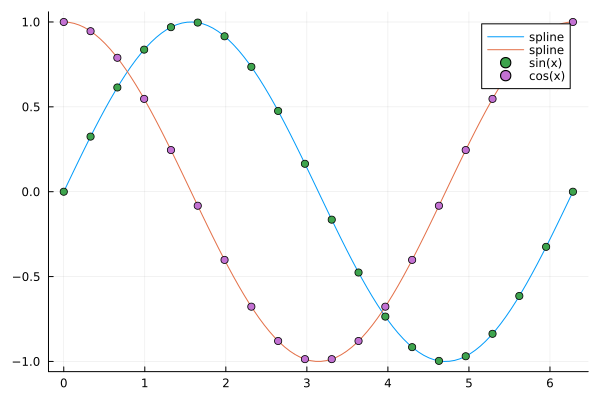

In [3]:
# example: f = GPECsplines.spline_eval(spline, 3.2)
# plot the spline
xs_fine = collect(range(0.0, stop=2*pi, length=100))
fs_fine = GPECsplines.spline_eval(spline, xs_fine)
plot(xs_fine, fs_fine, label="spline", legend=:topright)
# plot the input data scatter
scatter!(xs, fs, label="sin(x)", legend=:topright)
scatter!(xs, fc, label="cos(x)", legend=:topright)

In [4]:
# Make e^-ix and e^ix spline
xs = range(0.0, stop=2*pi, length=20)
xs = collect(xs)
fm = exp.(-im .* xs)
fp = exp.(im .* xs)
# Make a vector of vectors of (100,2) for the spline
fs_matrix = hcat(fm, fp)

print(xs)
spline = GPECsplines.spline_setup(xs, fs_matrix, 2)


[0.0, 0.3306939635357677, 0.6613879270715354, 0.9920818906073031, 1.3227758541430708, 1.6534698176788385, 1.9841637812146062, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.9683275624292125, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586]hi2 cspline_c_setup: setting up spline with mx =                    19  and nqty =                     2
 xs =    0.0000000000000000       0.33069396353576769       0.66138792707153538       0.99208189060730312        1.3227758541430708        1.6534698176788385        1.9841637812146062        2.3148577447503738        2.6455517082861415        2.9762456718219092        3.3069396353576770        3.6376335988934447        3.9683275624292125        4.2990215259649798        4.6297154895007475        4.9604094530365153        5.2911034165722830        5.6217973801080507        5.9524913436438185        6.283185307179

GPECsplines.CSpline(Ptr{Nothing} @0x00000001246aeec0, [0.0, 0.3306939635357677, 0.6613879270715354, 0.9920818906073031, 1.3227758541430708, 1.6534698176788385, 1.9841637812146062, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.9683275624292125, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586], ComplexF64[1.0 - 0.0im 1.0 + 0.0im; 0.9458172417006346 - 0.32469946920468346im 0.9458172417006346 + 0.32469946920468346im; … ; 0.9458172417006346 + 0.32469946920468373im 0.9458172417006346 - 0.32469946920468373im; 1.0 + 2.4492935982947064e-16im 1.0 - 2.4492935982947064e-16im], 19, 2, 0, 2)

hi3


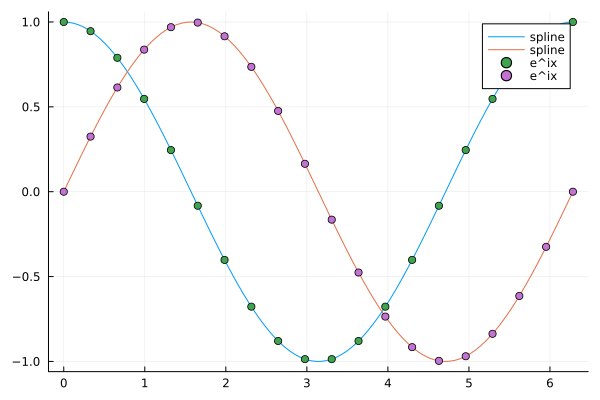

In [10]:
# example: f = GPECsplines.spline_eval(spline, 3.2)
# plot the spline
xs_fine = collect(range(0.0, stop=2*pi, length=100))
fs_fine = GPECsplines.spline_eval(spline, xs_fine)

# plot just the real part of e^(+ix)
plot(xs_fine, real(fs_fine[:, 2]), label="spline", legend=:topright)
# and the imaginary part
plot!(xs_fine, imag(fs_fine[:, 2]), label="spline", legend=:topright)
# plot the input data scatter
scatter!(xs, real(fs_matrix[:, 2]), label="e^ix", legend=:topright)
scatter!(xs, imag(fs_matrix[:, 2]), label="e^ix", legend=:topright)